# Birthday problem

#### 50 people are selected at random, what are the chances that at least 2 of them have same birthdays

In [1]:
n <- 50
# Since birthdays can also be represented as numbers between 1-365, then we select 50 birthdays with replacement
bdays <- sample(1:365, n, replace=TRUE)

In [2]:
bdays

[1]  99 186 239  48 348 120  60 143 301 177 260 358 103 273 133 278 329 201  91
[20] 331 151  20  32  56 288 117 214 351 258 129  82  99   6  28 332  39   8 144
[39] 261 162 318 181 185 342 176  70 144  22  49 218

In [3]:
duplicated(bdays)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[49] FALSE FALSE

In [4]:
any(duplicated(bdays))

[1] TRUE

#### Perform monte carlo simulation to check above result again and again

In [5]:
B <- 10000
results <- replicate(B, {
    bdays <- sample(1:365, n, replace=TRUE)
    any(duplicated(bdays))
})

In [6]:
mean(results) # Very high probability for at least 2 people to have same birthdays

[1] 0.9731

## When are chances greater than 75% or 50%?
### Creating lookup table to compute that

In [7]:
compute_prob <- function(n, B=10000) {
    same_day <- replicate(B, {
        bdays <- sample(1:365, n, replace=TRUE)
        any(duplicated(bdays))
    })
    mean(same_day)
}

In [11]:
compute_prob(50)

[1] 0.97

In [14]:
n <- seq(1,60) # Getting a sequence to run compute_prob in loop
n

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60

In [15]:
prob <- sapply(n, compute_prob)

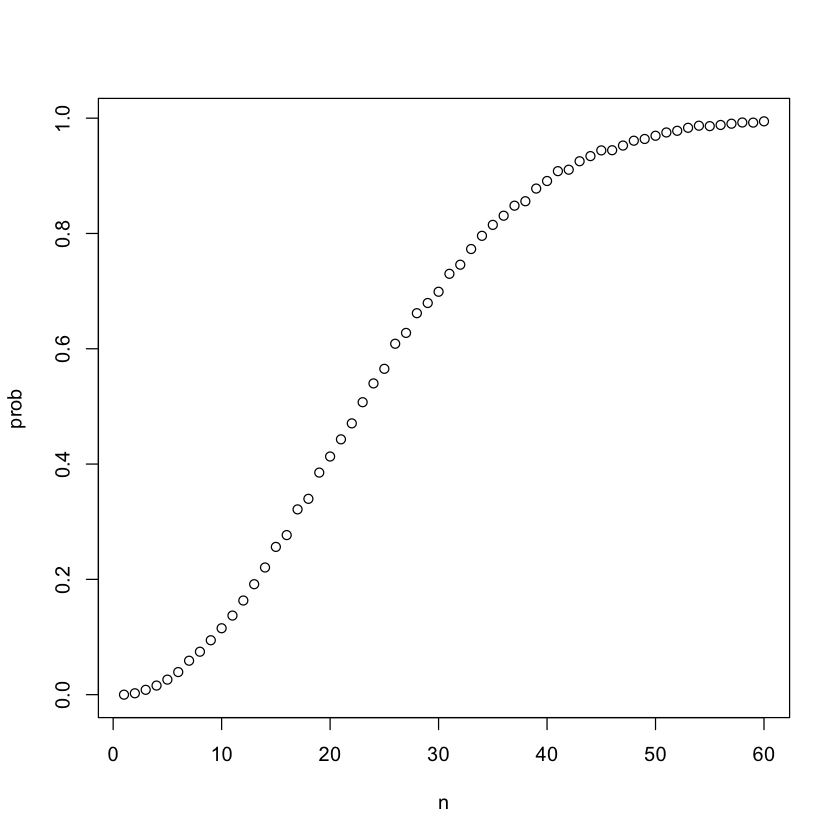

In [16]:
plot(n, prob)

### Compute exact value without monte carlo simulation

#### Can be computed using multiplication rule

Pr(person 1 has a unique bday) = 1 <br>
Pr(person 2 has a unique bday | person 1 has a unique bday) = 364/365 <br>
Pr(person 3 has unique bday | person 1 and 2 have unique bdays) = 363/365 <br>
.<br>
.<br>


\begin{align}
1 \times \frac{364}{365} \times \frac{363}{365} ... \frac{365-n+1}{365}
\end{align}

In [27]:
exact_prob <- function(n) {
    prob_unique <- seq(365, 365-n+1)/365
    1 - prod(prob_unique)
}

In [28]:
eprob <- sapply(n , exact_prob)

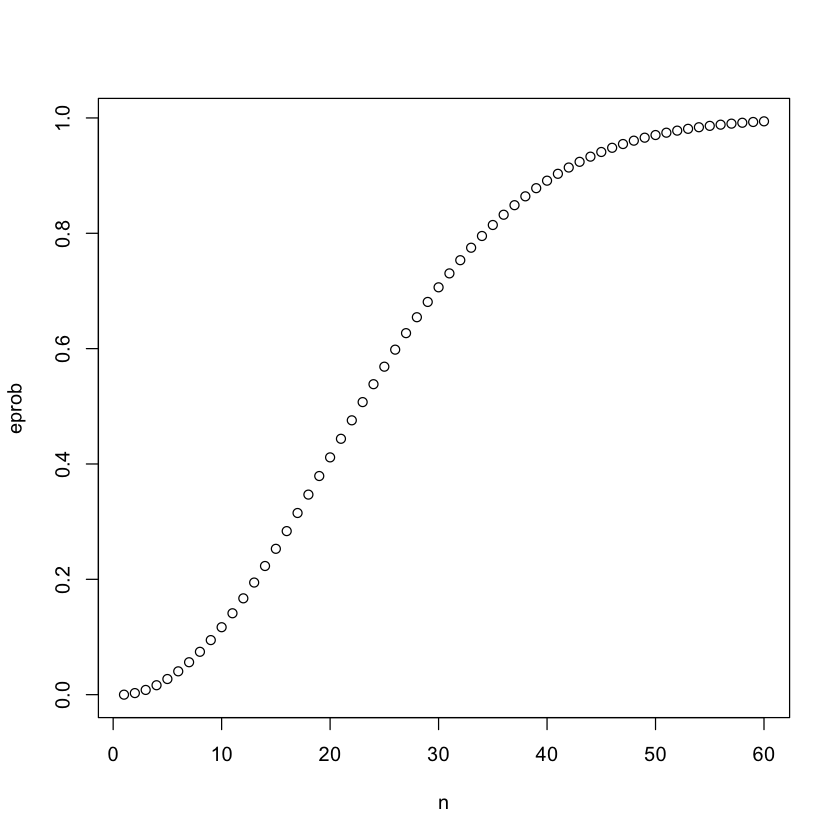

In [29]:
plot(n, eprob)